In [17]:
from utils import *
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [19]:
df_original = pd.read_csv("data/M.csv") \
                .pipe(clean_data) 

In [20]:
def line_data(df, movement_function):
    return df  \
        .pipe(movement_function) \
        .assign(MaxDate = lambda df: pd.to_datetime((df.Date.max() - datetime.timedelta(days=0)).date()),
                MinDate = lambda df: pd.to_datetime((df.Date.min() - datetime.timedelta(days=0)).date())) \
        .query("Date.between(MinDate, MaxDate)") \
        .assign(Month = lambda dataset: dataset.Date.map(lambda value: value.replace(day = 1))) \
        .groupby(["Month", "Tipo", "Categoria", "Subcategoria", "Beneficiario"], as_index = False).Importe.sum() \
        .assign(Importe = lambda df: df.Importe.abs())

In [21]:
df = line_data(df_original, return_hogar_movements)

In [22]:
df

,Month,Tipo,Categoria,Subcategoria,Beneficiario,Importe
0,2022-01-01,Gastos,Cultura,Cine,RENOIR,26.00
1,2022-01-01,Gastos,Cultura,Libros,AMAZON,9.93
2,2022-01-01,Gastos,Cultura,Libros,FABULA,18.91
3,2022-01-01,Gastos,Extras,Ajustes,No Definido,17.13
4,2022-01-01,Gastos,Extras,Casa,BRICOMART,0.70
...,...,...,...,...,...,...
956,2022-12-01,Ingresos,Ingresos,Cursos,IMMUNE,3506.25
957,2022-12-01,Ingresos,Ingresos,Despacho,No Definido,1675.07
958,2022-12-01,Ingresos,Ingresos,Intereses Bancarios,INGDIRECT,5.33
959,2022-12-01,Ingresos,Ingresos,Intereses Bancarios,OPENBANK,17.49


In [23]:
def total_bar_data(df):
    return df  \
        .assign(MaxDate = lambda df: pd.to_datetime((df.Date.max() - datetime.timedelta(days=0)).date()),
                MinDate = lambda df: pd.to_datetime((df.Date.min() - datetime.timedelta(days=0)).date())) \
        .query("Date.between(MinDate, MaxDate)") \
        .groupby(["Tipo"], as_index = False).Importe.sum() \
        .assign(Importe = lambda df: df.Importe.abs())

In [26]:
df_total = pd.read_csv("data/M.csv") \
                .pipe(clean_data) \
                .pipe(return_hogar_movements) \
                .pipe(total_bar_data)

In [27]:
df_total

,Tipo,Importe
0,Gastos,79309.81
1,Ingresos,81666.30


In [28]:
def bar_data(df):
    return df  \
        .assign(MaxDate = lambda df: pd.to_datetime((df.Date.max() - datetime.timedelta(days=0))),
                MinDate = lambda df: pd.to_datetime((df.Date.min() - datetime.timedelta(days=0)))) \
        .query("Date.between(MinDate, MaxDate)") \
        .assign(Month = lambda dataset: dataset.Date.map(lambda value: value.replace(day = 1))) \
        .groupby(["Month", "Tipo"], as_index = False).Importe.sum() \
        .assign(Importe = lambda df: df.Importe.abs(),
                ImporteAcum = lambda dataset: dataset.groupby("Tipo").Importe.transform(lambda x: x.cumsum())
               )

In [31]:
df = pd.read_csv("data/M.csv") \
                .pipe(clean_data) \
                .pipe(return_hogar_movements) \
                .pipe(bar_data)

In [32]:
df

,Month,Tipo,Importe,ImporteAcum
0,2022-01-01,Gastos,4858.84,4858.84
1,2022-01-01,Ingresos,2642.34,2642.34
2,2022-02-01,Gastos,4370.48,9229.32
3,2022-02-01,Ingresos,9696.62,12338.96
4,2022-03-01,Gastos,5208.63,14437.95
5,2022-03-01,Ingresos,7735.52,20074.48
6,2022-04-01,Gastos,5062.51,19500.46
7,2022-04-01,Ingresos,5602.14,25676.62
8,2022-05-01,Gastos,5210.00,24710.46
9,2022-05-01,Ingresos,5627.59,31304.21


In [33]:
color_discrete_map = {'Gastos': '#F8766B', 'Ingresos': '#94E8BB'}

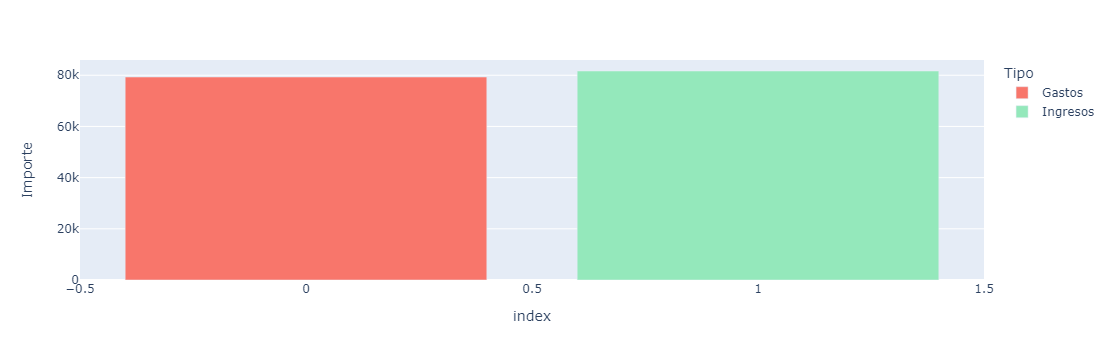

In [34]:
import plotly.express as px
fig = px.bar(df_total, color = "Tipo", y='Importe', color_discrete_map=color_discrete_map)
fig.show()

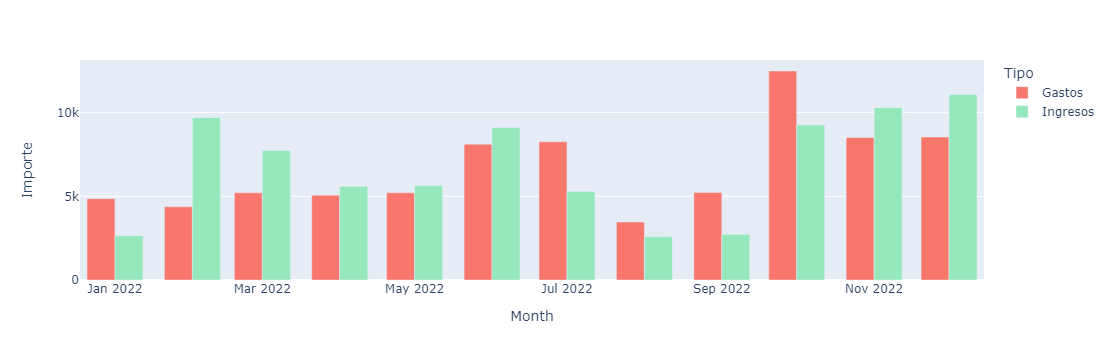

In [35]:
import plotly.express as px
fig = px.bar(df, x = "Month",  y='Importe', color = "Tipo", barmode='group', color_discrete_map=color_discrete_map)
fig.show()

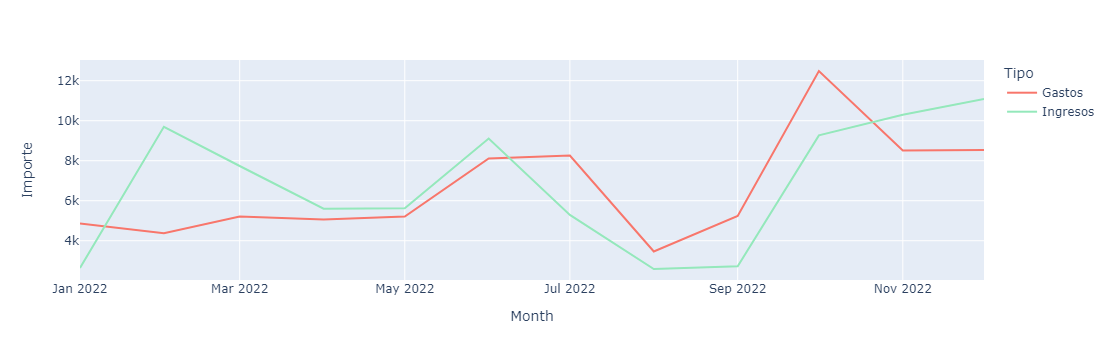

In [36]:
import plotly.express as px
fig = px.line(df, x = "Month",  y='Importe', color = "Tipo", color_discrete_map=color_discrete_map)
fig.show()

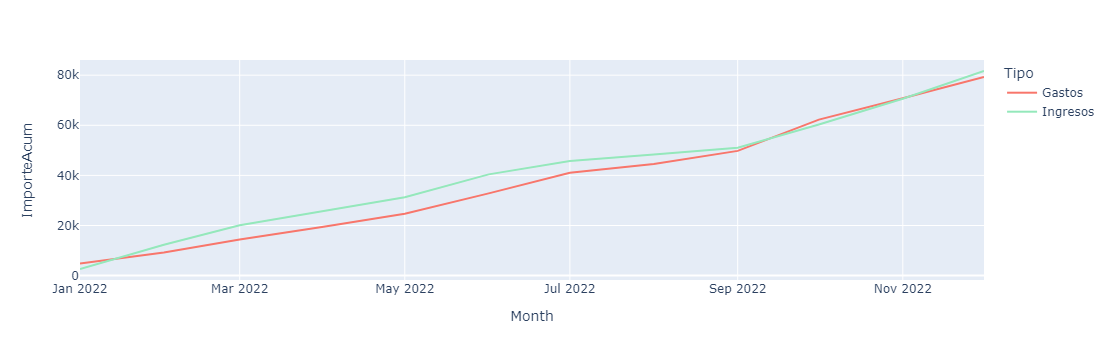

In [37]:
import plotly.express as px
fig = px.line(df, x = "Month",  y='ImporteAcum', color = "Tipo", color_discrete_map=color_discrete_map)
fig.show()